In [2]:
import pandas as pd

In [3]:
import numpy as np

In [3]:
df_train = pd.read_csv('C:\\Users\\Hp\\Desktop\\train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [4]:
test_data = pd.read_csv('C:\\Users\\Hp\\Desktop\\test_data.txt', sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
df_train.isnull().sum()


Title          0
Genre          0
Description    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords# to remove stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

<Axes: title={'center': 'Genre Count in the Dataset'}, xlabel='Genre', ylabel='Count'>

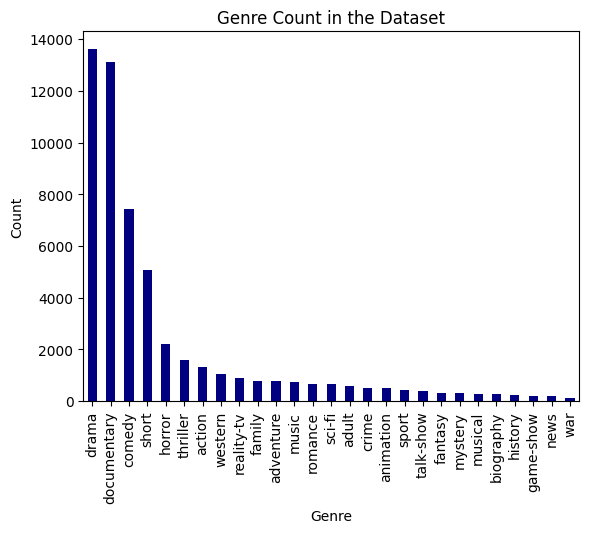

In [7]:
genre_count = df_train["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count in the Dataset")
genre_count.plot(kind='bar',color='navy')

Text(0.5, 1.0, 'Title length distribution')

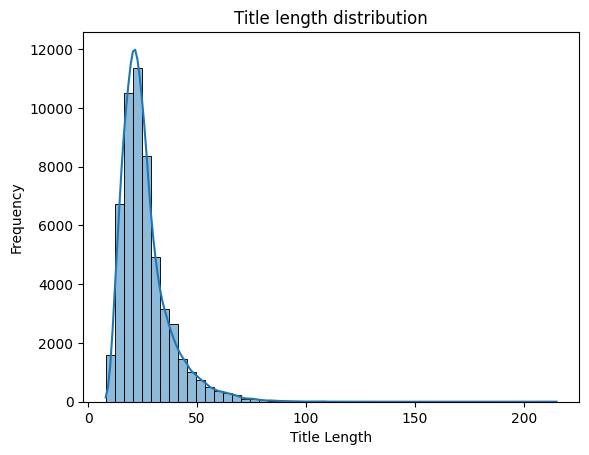

In [8]:
#genre and title length correlation
df_train['title_length'] = df_train['Title'].apply(len)
#popular title lengths
sns.histplot(data=df_train,x='title_length',bins=50,kde=True)
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.title("Title length distribution")

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import nltk
import subprocess

In [10]:
from nltk.corpus import wordnet

In [11]:
lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))
def text_prep(text):
    c_text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    c_text = c_text.lower()
    tokens = c_text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return " ".join(tokens)
df_train['Description']=df_train['Description'].apply(text_prep)
df_train

,Title,Genre,Description,title_length
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...,28
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,12
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,32
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,21
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,22
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,shortlived nbc live sitcom centered bonino wor...,15
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sister kapa bay s...,27
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedy growing facing ...,41
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...,24


In [12]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(df_train['Description'])

In [13]:
from sklearn.model_selection import train_test_split
y=df_train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.transform(y_test)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = nb.predict(X_train)
y_pred_test= nb.predict(X_test)
accuracy_train_nb = accuracy_score(y_train,y_pred_train)
accuracy_test_nb = accuracy_score(y_test,y_pred_test)
print(f"Accuracy of train : {accuracy_train_nb}")
print(f"Accuracy of test : {accuracy_test_nb}")

Accuracy of train : 0.46427336238500383
Accuracy of test : 0.4422207876049064


In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
# Transforming numerical labels back to genres
y_pred_train_genre = lab_enc.inverse_transform(y_pred_train_lr)
y_pred_train_genre = lab_enc.inverse_transform(y_pred_test_lr)

accuracy_train_lr=accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr=accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy of train : {accuracy_train_lr}")
print(f"Accuracy of test : {accuracy_test_lr}")

Accuracy of train : 0.7164464734500011
Accuracy of test : 0.5765931937655631
